## TP2 : Classification using Linear & Quadratic Discriminant Analysis

First think of configuring your notebook :

In [1]:
import csv
# import os
from pylab import *
import numpy as np
from numpy import linalg as la
import math

## Reading synthetic data
Load the training and test data sets |synth_train.txt| and
|synth_test.txt| already used for Knn. Targets belong to {1,2} and entries belong to R^2.
We have 100 training data samples and 200 test samples.

* the 1st column contains the label of the class the sample, 
* columns 2 & 3 contain the coordinates of each sample in 2D.

In [2]:
train = np.loadtxt('synth_train.txt')
test = np.loadtxt('synth_test.txt')

We would like to have an idea of the nature of data. We print the first lines of the training set.

In [3]:
print (train[0:10])

[[ 2.         -0.72221141  2.00447087]
 [ 2.         -0.92467912  0.48366928]
 [ 2.         -0.76602281  0.79432891]
 [ 2.         -0.07328948  0.96992915]
 [ 1.         -1.39291198  0.99969709]
 [ 2.         -0.20223339  1.35033191]
 [ 2.          0.48173767  0.98441858]
 [ 1.         -1.86551212  1.54773159]
 [ 2.         -0.15246873  0.92248969]
 [ 2.          0.38635649  0.36633672]]


First, we compute the minimum and the maximum of each feature (training set + test set), in order to know on which window we plot the points and the decision boundary.

In [4]:
print('Minimum of feature x : ', min(np.min(train[:,1]), np.min(test[:1])), ', maximum of feature x : ', max(np.max(train[:,1]), np.max(test[:,1])))
print('Minimum of feature y : ', min(np.min(train[:,2]), np.min(test[:2])), ', maximum of feature y : ', max(np.max(train[:,2]), np.max(test[:,2])))

Minimum of feature x :  -2.30408372892482 , maximum of feature x :  1.41253669598274
Minimum of feature y :  -0.516182355090629 , maximum of feature y :  3.87335148713437


We split the training set into 2 parts : a subset where target = 1 and a subset where target = 2.

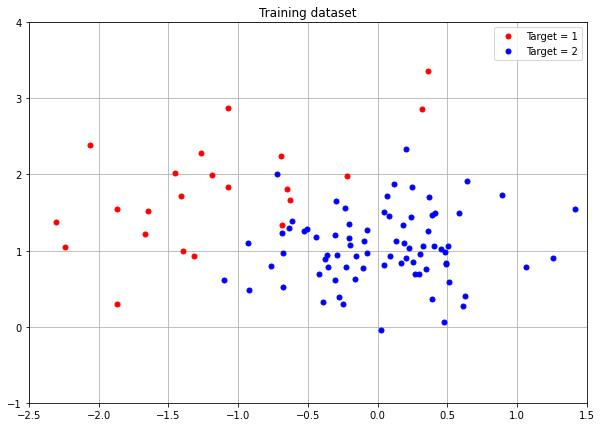

In [5]:
train_1 = train[train[:,0] == 1]
train_2 = train[train[:,0] == 2]
X_train_1, Y_train_1 = train_1[:,1], train_1[:,2]
X_train_2, Y_train_2 = train_2[:,1], train_2[:,2]
plt.figure(figsize=(10, 7))
plt.xlim(-2.5,1.5)
plt.ylim(-1,4)
plt.plot (X_train_1,Y_train_1, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Target = 1')
plt.plot (X_train_2,Y_train_2, linestyle = 'none', marker = 'o', c = 'blue', markersize = 5, label = 'Target = 2')
plt.legend()
plt.title("Training dataset")
plt.grid()
plt.show()

We do the same operation with the test set.

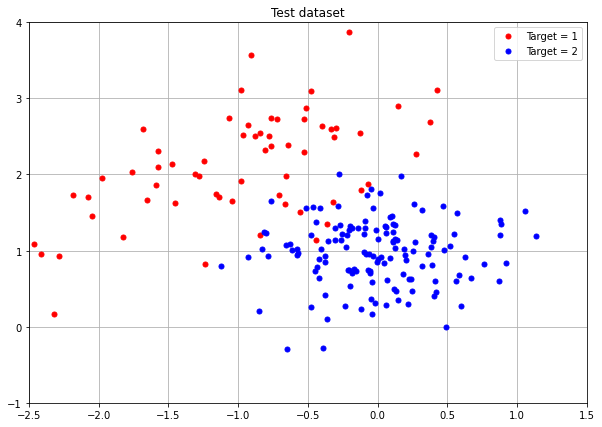

In [6]:
test_1 = test[test[:,0] == 1]
test_2 = test[test[:,0] == 2]
X_test_1, Y_test_1 = test_1[:,1], test_1[:,2]
X_test_2, Y_test_2 = test_2[:,1], test_2[:,2]
plt.figure(figsize=(10, 7))
plt.xlim(-2.5,1.5)
plt.ylim(-1,4)
plt.plot (X_test_1, Y_test_1, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Target = 1')
plt.plot (X_test_2, Y_test_2, linestyle = 'none', marker = 'o', c = 'blue', markersize = 5, label = 'Target = 2')
plt.legend()
plt.title("Test dataset")
plt.grid()
plt.show()

## Recall about the main steps of discriminant analysis:
* estimation of weights `pi_1` and `pi_2` for each class,
* estimation of empirical means `mu_1` and `mu_2` for each class, 
* estimation of empirical covariance matrices  `sigma_1` and `sigma_2`,
* computation of the common averaged covariance `sigma` (average of intra-class covariances),
* computation of log-probabilities of belonging to each class,
* decision of classification,
* display results.


## TO DO : linear & quadratic discriminant analysis (LDA & QDA)
1. Implement a classifier using LDA of the data set. 
2. Then implement QDA classification.
3. In each case (LDA & QDA) show the decision boundary and
compute the error rate respectively for the training set and the test set. 
4. Compare and comment on your results with LDA and QDA.
5. You may also compare your results to K nearest neighbours.

_Indication 1 : matrices `sigma` are of size 2x2.
More generally, be careful of the sizes of vectors and matrices you
manipulate._

_Indication 2 : to display the regions of decision, you may use:_


# Weights, empirical means and empirical covariance matrices

In [7]:
Nx1=200 # number of samples for display
Nx2=200
x1=np.linspace(-2.5,1.5,Nx1)  # sampling of the x1 axis 
x2=np.linspace(-1,4,Nx2)  # sampling of the x2 axis
X1,X2=np.meshgrid(x1,x2) 

N = len(train)
N1 = len(train_1)
N2 = len(train_2)
pi_1 = N1/N
pi_2 = N2/N

mu_1 = np.zeros(2) 
mu_2 = np.zeros(2) 
     
mu_1[0]=np.sum(train_1[:,1])/N1
mu_1[1]=np.sum(train_1[:,2])/N1
mu_2[0]=np.sum(train_2[:,1])/N2
mu_2[1]=np.sum(train_2[:,2])/N2
 
sigma_1 = np.zeros((2,2))
sigma_2 = np.zeros((2,2))
for i in range (len(train_1)):
    sigma_1 += np.outer(train_1[i,1:]-mu_1, train_1[i,1:]-mu_1)
for i in range (len(train_2)):
    sigma_2 += np.outer(train_2[i,1:]-mu_2, train_2[i,1:]-mu_2)
    
sigma_1 = sigma_1/N1
sigma_2 = sigma_2/N2
sigma = (N1/N)*sigma_1 + (N2/N)*sigma_2

# LDA

In [8]:
#LDA classifier
def y1_LDA(x):
    return (x.T)@np.linalg.inv(sigma)@mu_1-0.5*mu_1.T@np.linalg.inv(sigma)@mu_1+math.log(pi_1)

def y2_LDA(x):
    return (x.T)@np.linalg.inv(sigma)@mu_2-0.5*mu_2.T@np.linalg.inv(sigma)@mu_2+math.log(pi_2)

#function that gives the prediction on a data set "data"
def predire_LDA (data):
    pred = []
    for i in range(len(data)):
        if y1_LDA(data[i,1:])>y2_LDA(data[i,1:]):
            pred.append(1)
        else :
            pred.append(2)
    return (pred)

## Prediction and error rate on training set

In [9]:
comparaison_train = (predire_LDA(train)==train[:,0])
print('Error rate for the training set with LDA : ', "{:.2%}".format(len(comparaison_train[comparaison_train[:]==False])/len(comparaison_train)))

Error rate for the training set with LDA :  3.00%


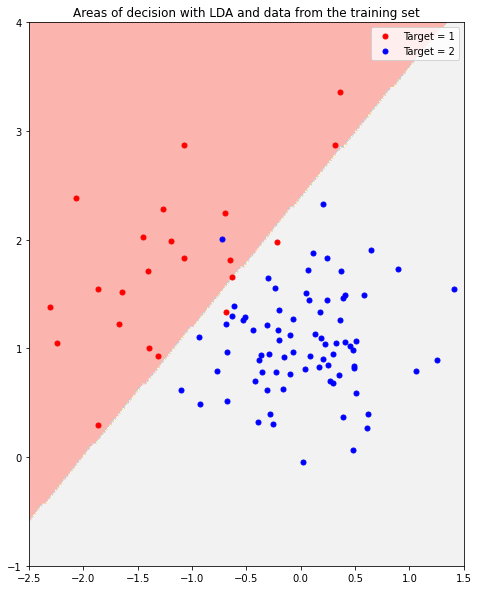

In [10]:
def prediction_LDA (x,y):
    if y1_LDA(np.array([x,y])) > y2_LDA(np.array([x,y])):
        return 1
    else :
        return 2
    
class_LDA = np.zeros((Nx1, Nx2))
for i in range (Nx1):
    for j in range(Nx2):
        class_LDA[i][j]=prediction_LDA(X1[i][j], X2[i][j])


plt.figure(figsize=(10, 10))
plt.imshow(class_LDA, cmap=plt.cm.Pastel1, origin = 'lower', extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)))
plt.plot (X_train_1,Y_train_1, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Target = 1')
plt.plot (X_train_2,Y_train_2, linestyle = 'none', marker = 'o', c = 'blue', markersize = 5, label = 'Target = 2')
plt.legend()
plt.title("Areas of decision with LDA and data from the training set")
plt.show()

## Prediction and error rate on test set

In [11]:
comparaison_test = (predire_LDA(test)==test[:,0])
print('Error rate for the test set with LDA : ', "{:.2%}".format(len(comparaison_test[comparaison_test[:]==False])/len(comparaison_test)))

Error rate for the test set with LDA :  5.50%


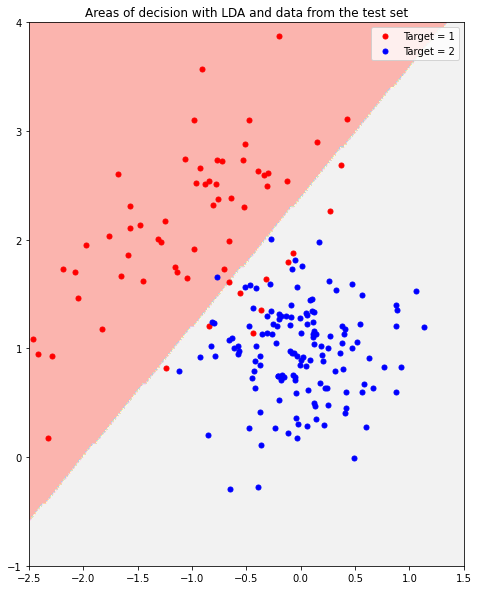

In [12]:
plt.figure(figsize=(10, 10))
plt.imshow(class_LDA, cmap=plt.cm.Pastel1, origin = 'lower', extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)))
plt.plot (X_test_1,Y_test_1, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Target = 1')
plt.plot (X_test_2,Y_test_2, linestyle = 'none', marker = 'o', c = 'blue', markersize = 5, label = 'Target = 2')
plt.legend()
plt.title("Areas of decision with LDA and data from the test set")
plt.show()

# QDA

In [13]:
#QDA classifier
def y1_QDA(x):
    return -0.5*((x-mu_1).T)@np.linalg.inv(sigma_1)@(x-mu_1)+math.log(pi_1)-0.5*math.log(np.linalg.det(sigma_1))

def y2_QDA(x):
    return -0.5*((x-mu_2).T)@np.linalg.inv(sigma_2)@(x-mu_2)+math.log(pi_2)-0.5*math.log(np.linalg.det(sigma_2))

#function that gives the prediction on a data set "data"
def predire_QDA (data):
    pred = []
    for i in range(len(data)):
        if y1_QDA(data[i,1:])>y2_QDA(data[i,1:]):
            pred.append(1)
        else :
            pred.append(2)
    return (pred)

## Prediction and error rate on training set

In [14]:
comparaison_train = (predire_QDA(train)==train[:,0])
print('Error rate for the training set with QDA : ', "{:.2%}".format(len(comparaison_train[comparaison_train[:]==False])/len(comparaison_train)))

Error rate for the training set with QDA :  5.00%


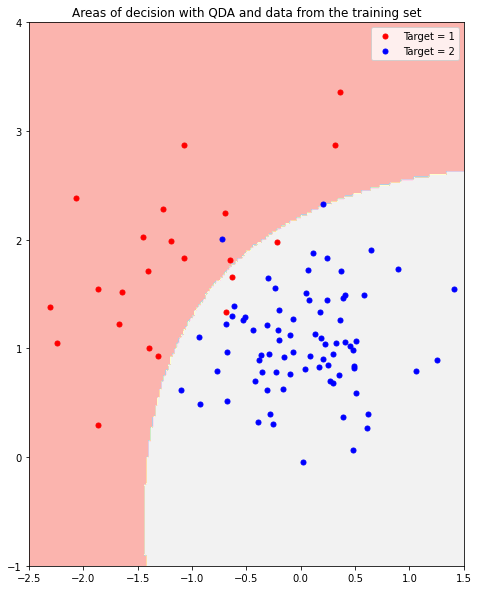

In [15]:
def prediction_QDA (x,y):
    if y1_QDA(np.array([x,y])) > y2_QDA(np.array([x,y])):
        return 1
    else :
        return 2   
    
class_QDA = np.zeros((Nx1, Nx2))
for i in range (Nx1):
    for j in range(Nx2):
        class_QDA[i][j]=prediction_QDA(X1[i][j], X2[i][j])
        
plt.figure(figsize=(10, 10))
plt.imshow(class_QDA, origin = 'lower', cmap=plt.cm.Pastel1, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)))
plt.plot (X_train_1,Y_train_1, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Target = 1')
plt.plot (X_train_2,Y_train_2, linestyle = 'none', marker = 'o', c = 'blue', markersize = 5, label = 'Target = 2')
plt.legend()
plt.title("Areas of decision with QDA and data from the training set")
plt.show()

## Prediction and error rate on test set

In [16]:
comparaison_test = (predire_QDA(test)==test[:,0])
print('Error rate for the test set with QDA : ', "{:.2%}".format(len(comparaison_test[comparaison_test[:]==False])/len(comparaison_test)))

Error rate for the test set with QDA :  5.00%


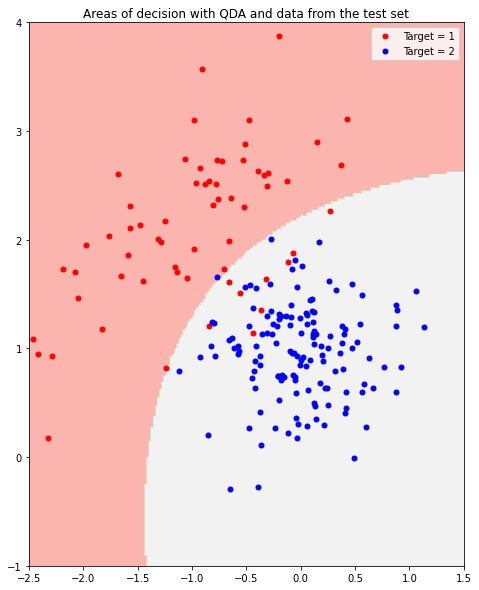

In [17]:
plt.figure(figsize=(10, 10))
plt.imshow(class_QDA, cmap=plt.cm.Pastel1, origin = 'lower', extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)))
plt.plot (X_test_1,Y_test_1, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Target = 1')
plt.plot (X_test_2,Y_test_2, linestyle = 'none', marker = 'o', c = 'blue', markersize = 5, label = 'Target = 2')
plt.legend()
plt.title("Areas of decision with QDA and data from the test set")
plt.show()

# K nearest neighbours

We implement the K nearest neighbours method. We work on the problem of classification with 2 classes, so we choose an odd value for K in order to avoid cases of equality.

In [18]:
def distance (point1, point2):
    return np.sqrt((point1[0]-point2[0])**2+(point1[1]-point2[1])**2)

def nearest_neighbours (point, k):
    distances = []
    for i in range (len(train)):
        distances.append(distance(train[i,1:], point))
    indices = np.argsort(distances)
    distances_ordonnes = np.sort(distances)
    indices_voisins = indices[:k]
    distances_voisins = distances_ordonnes[:k]
    voisins = train[indices_voisins]
    if np.count_nonzero(voisins[:,0] == 1)>np.count_nonzero(voisins[:,0] == 2):
        return 1
    else:
        return 2

def predire_NN (data, k):
    pred = []
    for i in range (len(data)):
        pred.append(nearest_neighbours (data[i,1:], k))
    return (pred)

In [19]:
for k in range(1,20, 2):
    comparaison_train = (predire_NN(train, k)==train[:,0])
    print('Error rate for the training set with K Nearest Neighbours (K = ', k, ') : ', "{:.2%}".format(len(comparaison_train[comparaison_train[:]==False])/len(comparaison_train)))

Error rate for the training set with K Nearest Neighbours (K =  1 ) :  0.00%
Error rate for the training set with K Nearest Neighbours (K =  3 ) :  3.00%
Error rate for the training set with K Nearest Neighbours (K =  5 ) :  5.00%
Error rate for the training set with K Nearest Neighbours (K =  7 ) :  6.00%
Error rate for the training set with K Nearest Neighbours (K =  9 ) :  6.00%
Error rate for the training set with K Nearest Neighbours (K =  11 ) :  7.00%
Error rate for the training set with K Nearest Neighbours (K =  13 ) :  8.00%
Error rate for the training set with K Nearest Neighbours (K =  15 ) :  8.00%
Error rate for the training set with K Nearest Neighbours (K =  17 ) :  8.00%
Error rate for the training set with K Nearest Neighbours (K =  19 ) :  8.00%


In [20]:
for k in range(1,20, 2):
    comparaison_test = (predire_NN(test, k)==test[:,0])
    print('Error rate for the test set with K Nearest Neighbours (K = ', k, ') : ', "{:.2%}".format(len(comparaison_test[comparaison_test[:]==False])/len(comparaison_test)))

Error rate for the test set with K Nearest Neighbours (K =  1 ) :  6.50%
Error rate for the test set with K Nearest Neighbours (K =  3 ) :  4.50%
Error rate for the test set with K Nearest Neighbours (K =  5 ) :  6.00%
Error rate for the test set with K Nearest Neighbours (K =  7 ) :  7.00%
Error rate for the test set with K Nearest Neighbours (K =  9 ) :  7.50%
Error rate for the test set with K Nearest Neighbours (K =  11 ) :  9.00%
Error rate for the test set with K Nearest Neighbours (K =  13 ) :  8.00%
Error rate for the test set with K Nearest Neighbours (K =  15 ) :  7.50%
Error rate for the test set with K Nearest Neighbours (K =  17 ) :  8.00%
Error rate for the test set with K Nearest Neighbours (K =  19 ) :  8.00%


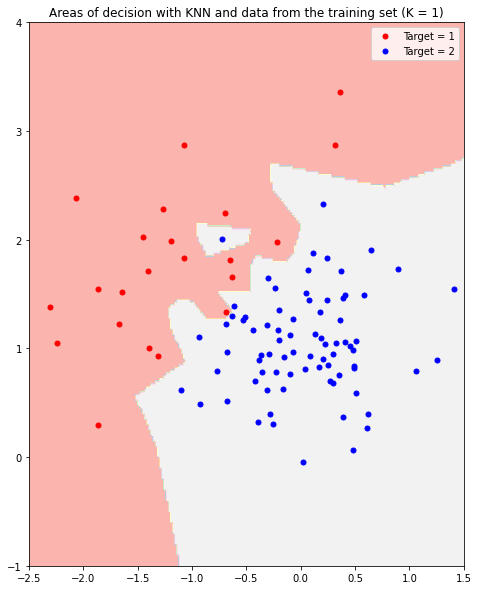

In [21]:
k = 1
class_KNN = np.zeros((Nx1, Nx2))
for i in range (Nx1):
    for j in range(Nx2):
        class_KNN[i][j]=nearest_neighbours([X1[i][j], X2[i][j]], k)


plt.figure(figsize=(10, 10))
plt.imshow(class_KNN, cmap=plt.cm.Pastel1, origin = 'lower', extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)))
plt.plot (X_train_1,Y_train_1, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Target = 1')
plt.plot (X_train_2,Y_train_2, linestyle = 'none', marker = 'o', c = 'blue', markersize = 5, label = 'Target = 2')
plt.legend()
plt.title("Areas of decision with KNN and data from the training set (K = 1)")
plt.show()

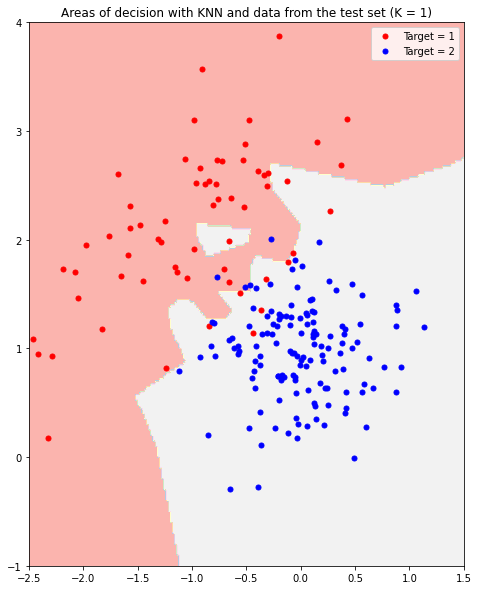

In [22]:
plt.figure(figsize=(10, 10))
plt.imshow(class_KNN, cmap=plt.cm.Pastel1, origin = 'lower', extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)))
plt.plot (X_test_1,Y_test_1, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Target = 1')
plt.plot (X_test_2,Y_test_2, linestyle = 'none', marker = 'o', c = 'blue', markersize = 5, label = 'Target = 2')
plt.legend()
plt.title("Areas of decision with KNN and data from the test set (K = 1)")
plt.show()

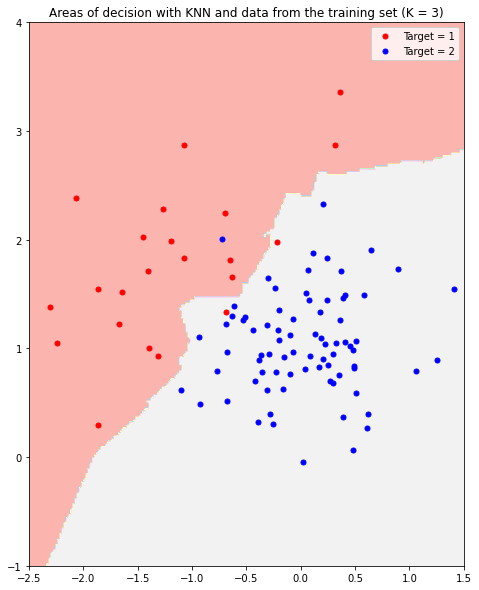

In [23]:
k = 3
class_KNN3 = np.zeros((Nx1, Nx2))
for i in range (Nx1):
    for j in range(Nx2):
        class_KNN3[i][j]=nearest_neighbours([X1[i][j], X2[i][j]], k)


plt.figure(figsize=(10, 10))
plt.imshow(class_KNN3, cmap=plt.cm.Pastel1, origin = 'lower', extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)))
plt.plot (X_train_1,Y_train_1, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Target = 1')
plt.plot (X_train_2,Y_train_2, linestyle = 'none', marker = 'o', c = 'blue', markersize = 5, label = 'Target = 2')
plt.legend()
plt.title("Areas of decision with KNN and data from the training set (K = 3)")
plt.show()

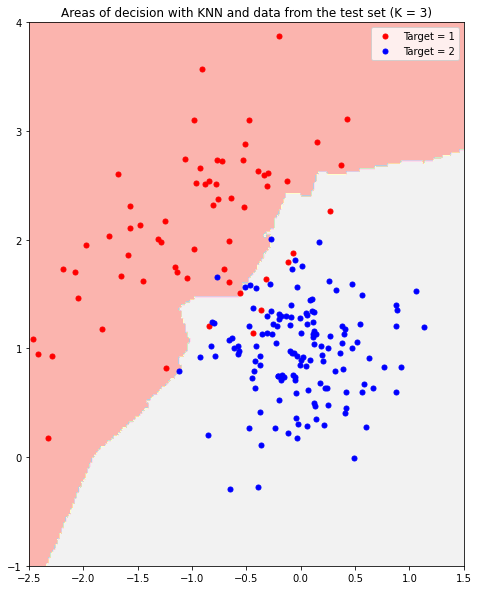

In [24]:
plt.figure(figsize=(10, 10))
plt.imshow(class_KNN3, cmap=plt.cm.Pastel1, origin = 'lower', extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)))
plt.plot (X_test_1,Y_test_1, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Target = 1')
plt.plot (X_test_2,Y_test_2, linestyle = 'none', marker = 'o', c = 'blue', markersize = 5, label = 'Target = 2')
plt.legend()
plt.title("Areas of decision with KNN and data from the test set (K = 3)")
plt.show()

# Conclusions

With LDA, we obtain a 3% error rate on the training set. With the test set, the error is bigger (5,5%). This is logical because the test set represent unknown data, whereas the classifier is based on the training set.

We increase the error with QDA for the training set (5%), but we decrease it for the test set (5%). Indeed, thanks to its quadratic form, QDA fits better the data and is more flexible.

The K nearest neighbours method on the training set shows us that this method is more efficient for K = 1 (error rate = 0%) and K = 3 (error rate : 3%). For K = 0, the algorithm does not make any error because for each point, the prediction is based on the unique neighbour of the point : the point itself.

Then, we apply this method on the test set, and we focus on K = 1 and K = 3. With K = 1, we notice that prediction areas for target  = 2 are disconnected. Indeed, in the training set, there is an isolated blue point in the prediction area of target = 1. As we only focus on the nearest neighbour, we observe a phenomenon of overfitting. As a consequence, the red point situated in this area in the test set is predicted as a blue point. The error rate for the test set is higher than the error rate for LDA and QDA (6,5%).

With K = 3, we focus on the 3 nearest neighbours. As a consequence, there is no overfitting, the areas of prediction are not disconnected and the error rate is lower (4,5%). We have a better estimation than with LDA and QDA because KNN offers more flexible areas of decisions.

To conclude, the nearest neighbours method with K = 3 looks to be the method which best generalizes data.

## TO DO : LDA & QDA using scikit-learn module

The module `scikit-learn` is dedicated to machine learning algorithms. Many of them are available in a simple manner. For LDA and QDA, have a look at the tutorial available at http://scikit-learn.org/stable/modules/lda_qda.html 

**Warning** : you may have a critical view of the way LDA and QDA are illustrated in the proposed example...




# LDA with scikit-learn

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = train[:,1:]
y = train[:,0]
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
prediction_train = clf.predict(train[:,1:])
prediction_test = clf.predict(test[:,1:])

In [26]:
comparaison_train = (prediction_train==y)
print('Error rate for the train set with LDA : ', "{:.2%}".format(len(comparaison_train[comparaison_train[:]==False])/len(comparaison_train)))

Error rate for the train set with LDA :  3.00%


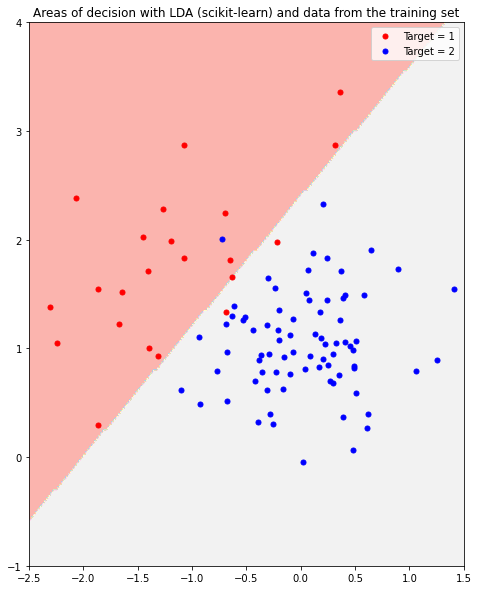

In [27]:
class_LDA_SL = np.zeros((Nx1, Nx2))
for i in range (Nx1):
    for j in range(Nx2):
        class_LDA_SL[i][j]=clf.predict([[X1[i][j], X2[i][j]]])


plt.figure(figsize=(10, 10))
plt.imshow(class_LDA_SL, cmap=plt.cm.Pastel1, origin = 'lower', extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)))
plt.plot (X_train_1,Y_train_1, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Target = 1')
plt.plot (X_train_2,Y_train_2, linestyle = 'none', marker = 'o', c = 'blue', markersize = 5, label = 'Target = 2')
plt.legend()
plt.title("Areas of decision with LDA (scikit-learn) and data from the training set")
plt.show()

In [28]:
comparaison_test = (prediction_test==test[:,0])
print('Error rate for the test set with LDA : ', "{:.2%}".format(len(comparaison_test[comparaison_test[:]==False])/len(comparaison_test)))

Error rate for the test set with LDA :  5.50%


# QDA with scikit-learn

In [29]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X, y)
prediction_train = clf.predict(train[:,1:])
prediction_test = clf.predict(test[:,1:])

In [30]:
comparaison_train = (prediction_train==y)
print('Error rate for the train set with QDA : ', "{:.2%}".format(len(comparaison_train[comparaison_train[:]==False])/len(comparaison_train)))

Error rate for the train set with QDA :  5.00%


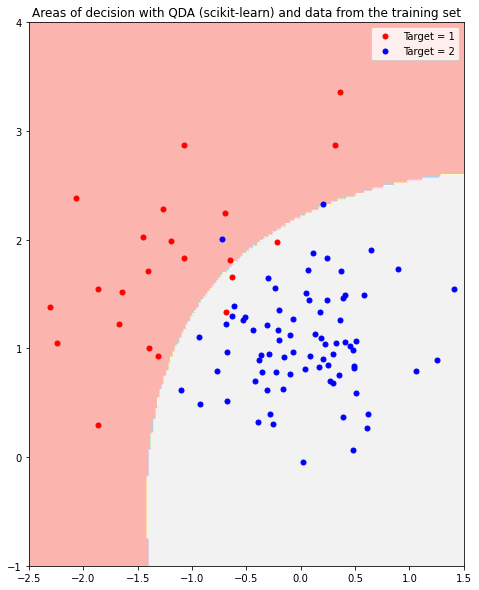

In [31]:
class_QDA_SL = np.zeros((Nx1, Nx2))
for i in range (Nx1):
    for j in range(Nx2):
        class_QDA_SL[i][j]=clf.predict([[X1[i][j], X2[i][j]]])


plt.figure(figsize=(10, 10))
plt.imshow(class_QDA_SL, cmap=plt.cm.Pastel1, origin = 'lower', extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)))
plt.plot (X_train_1,Y_train_1, linestyle = 'none', marker = 'o', c = 'red', markersize = 5, label = 'Target = 1')
plt.plot (X_train_2,Y_train_2, linestyle = 'none', marker = 'o', c = 'blue', markersize = 5, label = 'Target = 2')
plt.legend()
plt.title("Areas of decision with QDA (scikit-learn) and data from the training set")
plt.show()

In [32]:
comparaison_test = (prediction_test==test[:,0])
print('Error rate for the test set with QDA : ', "{:.2%}".format(len(comparaison_test[comparaison_test[:]==False])/len(comparaison_test)))

Error rate for the test set with QDA :  5.00%


When we use LDA and QDA algorithms from scikit-learn, we obtain the same areas of decisions and the same error rate. It allows us to check that our implementation of LDA and QDA is correct.

In the proposed example, the decision boundaries of QDA method on data with fixed covariance look linear. So LDA and QDA offer the same prediction in this case. As a consequence, QDA would make a difference with LDA for data with varying covariances.